In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sn

In [2]:
# Load data
movie_df = pd.read_csv("data/movie.metadata.tsv", sep='\t',names=["wikipedia_movie_ID","freebase_movie_ID",
                                                               "movie_name","movie_release_date",
                                                               "movie_box_office_revenue","movie_runtime",
                                                               "movie_languages", "movie_countries","movie_genres"])
movie_book_df = pd.read_csv("data/movie_book.csv")

In [3]:
# Display data
display(movie_df)
display(movie_book_df)

,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


,movie_wikipedia_id,book_wikidata_id
0,2205704,Q480
1,7379134,Q480
2,10117133,Q480
3,16233994,Q480
4,21447227,Q480
...,...,...
4652,32989529,Q120911074
4653,61191,Q121775426
4654,6851697,Q122186265
4655,2069950,Q119424284


In [4]:
#Clean columns
movie_df['movie_genres'] = movie_df['movie_genres'].apply(lambda x: np.take(x.split('"'), np.linspace(3,len(x.split('"'))-2, int((len(x.split('"'))-1)/4)).tolist()))
movie_df['movie_languages'] = movie_df['movie_languages'].apply(lambda x: np.take(x.split('"'), np.linspace(3,len(x.split('"'))-2, int((len(x.split('"'))-1)/4)).tolist()))
movie_df['movie_countries'] = movie_df['movie_countries'].apply(lambda x: np.take(x.split('"'), np.linspace(3,len(x.split('"'))-2, int((len(x.split('"'))-1)/4)).tolist()))
display(movie_df)

,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]"
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ..."


In [5]:
# Merge data
movie_merged_df = movie_df.merge(movie_book_df, left_on="wikipedia_movie_ID", right_on="movie_wikipedia_id", how='left').drop("movie_wikipedia_id",axis=1)
movie_merged_df['adaptation'] = movie_merged_df['book_wikidata_id'].notnull()

In [6]:
# Since the same movie is adapted from multiple books, let's keep one book per adaptation for now
movie_merged_df.drop_duplicates(subset='wikipedia_movie_ID', keep='first', inplace=True)
display(movie_merged_df)

,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,book_wikidata_id,adaptation
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",NaN,False
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,False
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN,False
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",NaN,False
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
81849,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama],NaN,False
81850,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",NaN,False
81851,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",NaN,False
81852,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",NaN,False


In [7]:
#Get the movie genre dataframe (1 movie has multiple genre)
movie_genre_df = movie_merged_df[['wikipedia_movie_ID','movie_genres']].explode(['movie_genres']).copy(deep=True)
display(movie_genre_df)

,wikipedia_movie_ID,movie_genres
0,975900,Thriller
0,975900,Science Fiction
0,975900,Horror
0,975900,Adventure
0,975900,Supernatural
...,...,...
81852,913762,Drama
81853,12476867,Thriller
81853,12476867,Horror
81853,12476867,Slasher


Text(0.5, 1.0, 'Movie box office revenue')

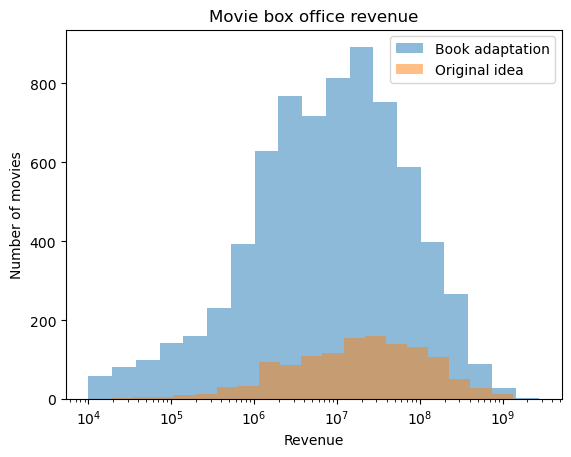

In [8]:
plt.hist(movie_merged_df.query('adaptation==False')['movie_box_office_revenue'].dropna(),bins=np.logspace(np.log10(movie_merged_df[movie_merged_df['adaptation']==False]['movie_box_office_revenue'].min()),np.log10(movie_merged_df[movie_merged_df['adaptation']==False]['movie_box_office_revenue'].max()),num=20,base=10), alpha=0.5)
plt.hist(movie_merged_df.query('adaptation==True')['movie_box_office_revenue'].dropna(),bins=np.logspace(np.log10(movie_merged_df[movie_merged_df['adaptation']==True]['movie_box_office_revenue'].min()),np.log10(movie_merged_df[movie_merged_df['adaptation']==True]['movie_box_office_revenue'].max()),num=20,base=10), alpha=0.5)
plt.xscale('log')
plt.legend(['Book adaptation', 'Original idea'])
plt.xlabel("Revenue")
plt.ylabel("Number of movies")
plt.title("Movie box office revenue")

In [9]:
st.ttest_ind(movie_merged_df.query('adaptation==True')['movie_box_office_revenue'].dropna(),
             movie_merged_df.query('adaptation==False')['movie_box_office_revenue'].dropna())

TtestResult(statistic=7.5519321590679125, pvalue=4.738255604022598e-14, df=8399.0)

Really small p-values, it seems that the mean revenues for adaptations and non adaptations are not the same... The positive result of the t-test says that box office revenue is higher for movies based on books.

In [10]:
# Let's observe the science fiction corpus
SF_df = movie_merged_df[movie_merged_df['wikipedia_movie_ID'].isin(movie_genre_df.query("movie_genres == 'Science Fiction'")['wikipedia_movie_ID'])]

In [11]:
SF_perc_adaptation = SF_df.query('adaptation == True')['adaptation'].count()/SF_df['adaptation'].count()*100
print("In Science Fiction movies, the percentage of adaptation is %.3f%%" %SF_perc_adaptation)


In Science Fiction movies, the percentage of adaptation is 10.256%


Text(0.5, 1.0, 'Science Fiction move box office revenue')

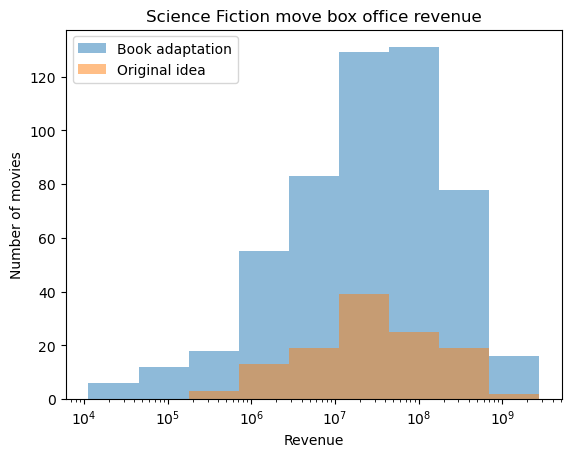

In [12]:
plt.hist(SF_df.query('adaptation == False')['movie_box_office_revenue'].dropna(), bins=np.logspace(np.log10(SF_df['movie_box_office_revenue'].min()), np.log10(SF_df['movie_box_office_revenue'].max()),num=10,base=10),alpha=0.5)
plt.hist(SF_df.query('adaptation == True')['movie_box_office_revenue'].dropna(), bins=np.logspace(np.log10(SF_df['movie_box_office_revenue'].min()), np.log10(SF_df['movie_box_office_revenue'].max()),num=10,base=10),alpha=0.5)
plt.xscale('log')
plt.legend(['Book adaptation', 'Original idea'])
plt.xlabel("Revenue")
plt.ylabel("Number of movies")
plt.title("Science Fiction move box office revenue")

In [13]:
st.ttest_ind(SF_df.query('adaptation == True')['movie_box_office_revenue'].dropna(),
             SF_df.query('adaptation == False')['movie_box_office_revenue'].dropna())

TtestResult(statistic=-0.14048596094397073, pvalue=0.8883197686141617, df=647.0)

Interesting, in some genre, the fact that the movie is based on a book may not influence the box office revenue....

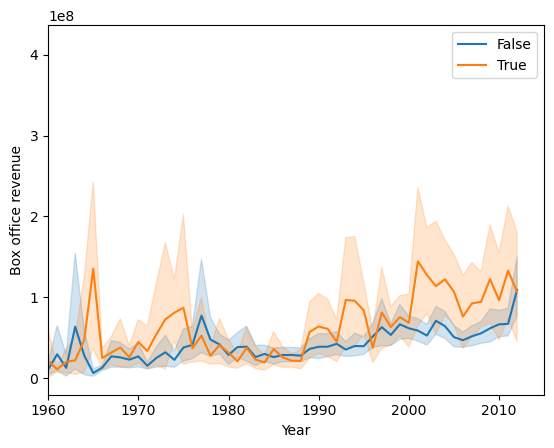

In [14]:
# Add a column with movie release year to the dataframe
movie_merged_df['movie_release_year'] = movie_merged_df['movie_release_date'].str.split('-').str[0]
movie_merged_df['movie_release_year'] = movie_merged_df['movie_release_year'].fillna('0')
movie_merged_df['movie_release_year'] = movie_merged_df['movie_release_year'].astype(int).replace(0, np.nan)

sn.lineplot(data=movie_merged_df, x='movie_release_year', y='movie_box_office_revenue',
            hue='adaptation', estimator='mean', errorbar=('ci', 95))
#plt.plot(movie_merged_df.query('adaptation == True').groupby('movie_release_year').movie_box_office_revenue.mean(), label='Book adaptation')
#plt.plot(movie_merged_df.query('adaptation == False').groupby('movie_release_year').movie_box_office_revenue.mean(), label='Original movie')
plt.xlabel('Year')
plt.ylabel('Box office revenue')
plt.xlim([1960, 2015])
plt.legend()

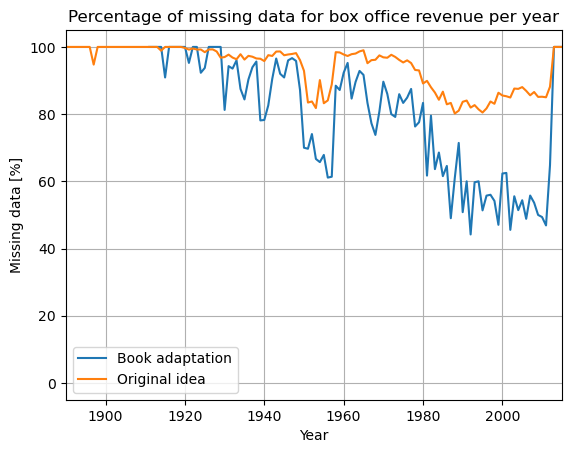

In [15]:
missing_revenue_adaptation = movie_merged_df.query('adaptation == True').groupby('movie_release_year')['movie_box_office_revenue'].apply(lambda x: (x.isna().sum()/len(x) * 100))
missing_revenue_original = movie_merged_df.query('adaptation == False').groupby('movie_release_year')['movie_box_office_revenue'].apply(lambda x: (x.isna().sum()/len(x) * 100))

plt.plot(missing_revenue_adaptation.index, missing_revenue_adaptation.values, label='Book adaptation')
plt.plot(missing_revenue_original.index, missing_revenue_original.values, label='Original idea')
plt.xlabel('Year')
plt.ylabel('Missing data [%]')
plt.title('Percentage of missing data for box office revenue per year')
plt.xlim([1890, 2015])
plt.legend()
plt.grid()

So many missing data... is it still relevant to analyze box office revenue ?

(1885.0, 2020.0)

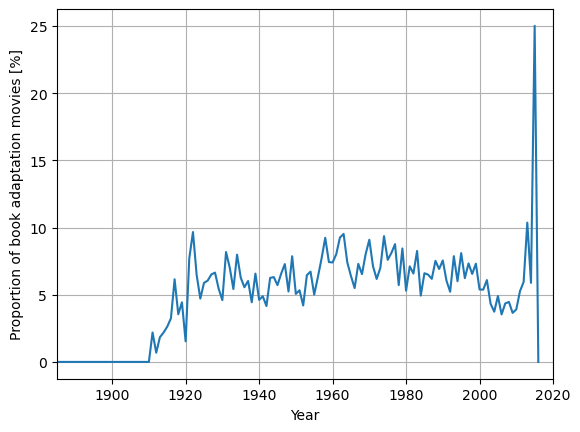

In [16]:
percent_adaptation = movie_merged_df.groupby('movie_release_year').apply(lambda x: len(x.query('adaptation == True'))/len(x)*100)

plt.plot(percent_adaptation)
plt.xlabel('Year')
plt.ylabel('Proportion of book adaptation movies [%]')
plt.grid()
plt.xlim([1885, 2020])

In [24]:
first_movie_genre = movie_genre_df.drop_duplicates(subset='wikipedia_movie_ID', keep='first').rename(columns={"movies_genres" : "first genre"})
movie_merged_df.merge(first_movie_genre, on='wikipedia_movie_ID', how='left')

,wikipedia_movie_ID,movie_genres
0,975900,Thriller
1,3196793,Mystery
2,28463795,Crime Fiction
3,9363483,Thriller
4,261236,Drama
...,...,...
81849,35228177,Drama
81850,34980460,Biographical film
81851,9971909,Satire
81852,913762,Science Fiction
